### Устанвока.

In [12]:
%pip install scikit-learn
%pip install phik
%pip install scipy


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Импорты, загрузка данных и работа с данными.

Распределение классов:
NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64

Абсолютные значения:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight              

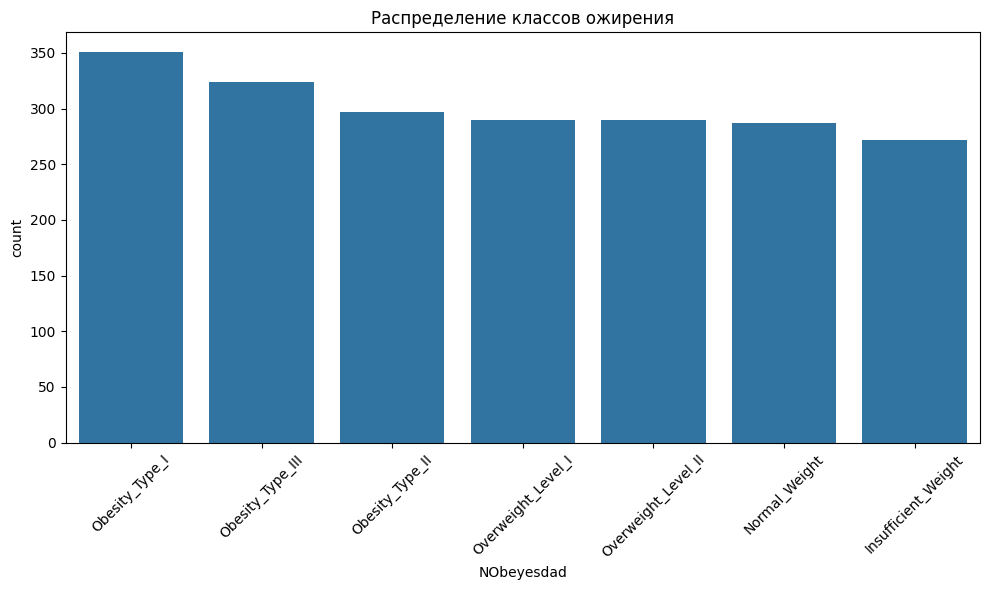


Категориальные признаки: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Числовые признаки: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


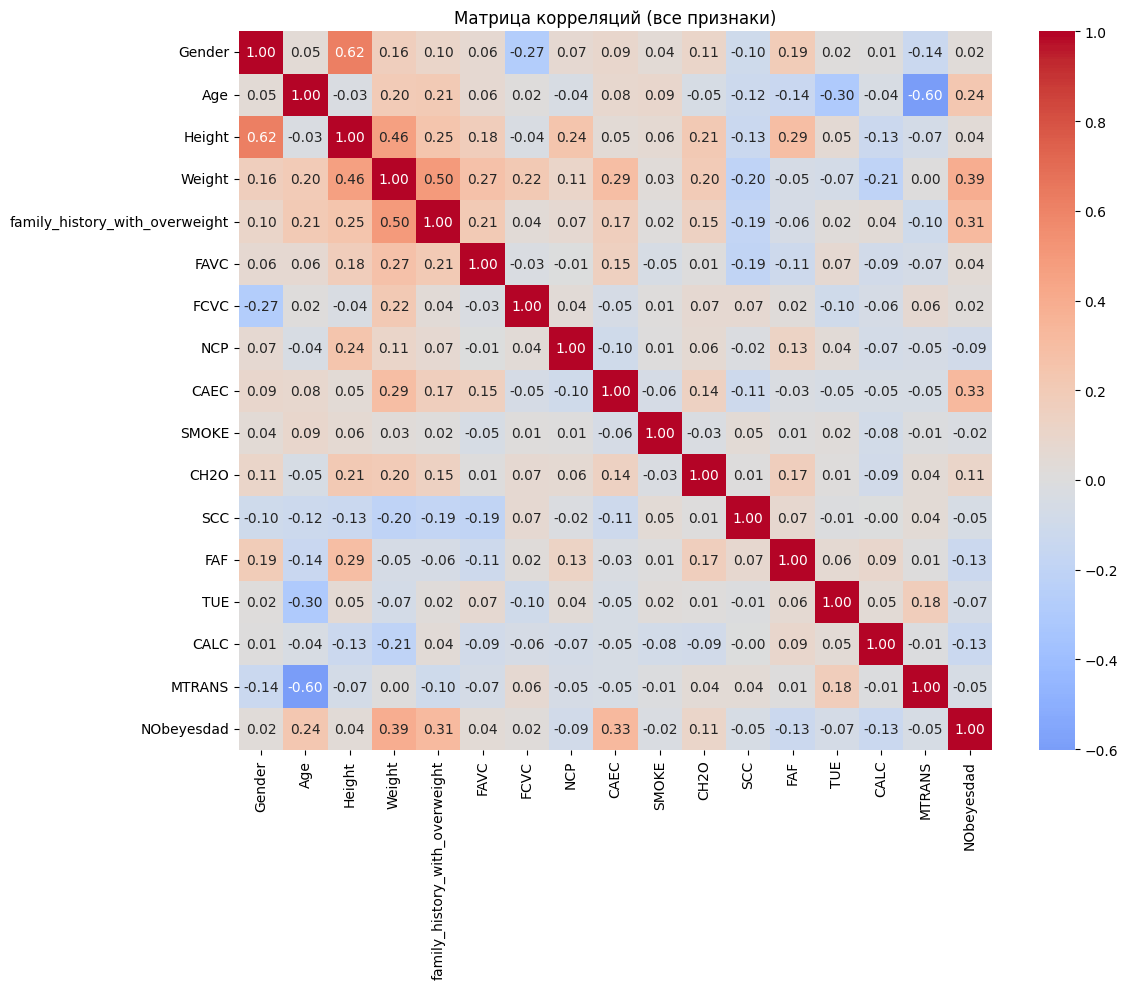

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
from phik import phik_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('/Users/polinamarina/Documents/praktika/ObesityDataSet.csv')

# Анализ распределения целевой переменной
print("Распределение классов:")
print(df['NObeyesdad'].value_counts(normalize=True))
print("\nАбсолютные значения:")
print(df['NObeyesdad'].value_counts())

# Основная информация о датасете
print("\nИнформация о датасете:")
print(df.info())
print(f"\nРазмер датасета: {df.shape}")

# Просмотр первых строк данных
print("\nПервые 5 строк данных:")
print(df.head())

# Проверка на пропущенные значения
print("\nПропущенные значения:")
print(df.isnull().sum())

# Статистическое описание числовых признаков
print("\nСтатистическое описание числовых признаков:")
print(df.describe())

# Визуализация распределения целевой переменной
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title('Распределение классов ожирения')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Анализ категориальных признаков
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"\nКатегориальные признаки: {list(categorical_columns)}")

# Анализ числовых признаков
numerical_columns = df.select_dtypes(include=[np.number]).columns
print(f"Числовые признаки: {list(numerical_columns)}")

# Кодирование категориальных переменных для анализа
df_encoded = df.copy()
label_encoders = {}

for col in categorical_columns:
    if col != 'NObeyesdad':  # Не кодируем целевую переменную пока
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Кодирование целевой переменной
target_encoder = LabelEncoder()
df_encoded['NObeyesdad_encoded'] = target_encoder.fit_transform(df['NObeyesdad'])

# Кодирование всех категориальных признаков
df_encoded = df.copy()

for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column].astype(str))

# Матрица корреляций 
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций (все признаки)')
plt.tight_layout()


### Перевод навзаний столбцов.
 1. Gender                                → Пол
 2. Age                                   → Возраст
 3. Height                                → Рост
 4. Weight                                → Вес
 5. family_history_with_overweight        → Семейная_история_лишнего_веса
 6. FAVC                                  → Частое_употребление_высококалорийной_еды
 7. FCVC                                  → Частота_употребления_овощей
 8. NCP                                   → Количество_основных_приемов_пищи
 9. CAEC                                  → Питание_между_приемами_пищи
10. SMOKE                                 → Курение
11. CH2O                                  → Потребление_воды
12. SCC                                   → Мониторинг_калорий
13. FAF                                   → Физическая_активность
14. TUE                                   → Время_за_электронными_устройствами
15. CALC                                  → Потребление_алкоголя
16. MTRANS                                → Тип_транспорта
17. NObeyesdad                            → Уровень_ожирения

### Типы данных.

In [23]:
df.dtypes

Gender                              object
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight      object
FAVC                                object
FCVC                              category
NCP                               category
CAEC                                object
SMOKE                               object
CH2O                              category
SCC                                 object
FAF                               category
TUE                               category
CALC                                object
MTRANS                              object
NObeyesdad                          object
dtype: object

### Разделение выборок.

In [25]:
# Разделение на признаки и целевую переменную
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777)

# Анализ распределения классов в выборках
print('Тренировочная выборка:\n', y_train.value_counts(normalize=True), sep='')
print('Тестовая выборка:\n', y_test.value_counts(normalize=True), sep='')

Тренировочная выборка:
NObeyesdad
Obesity_Type_I         0.166772
Obesity_Type_III       0.152874
Overweight_Level_II    0.140872
Obesity_Type_II        0.140240
Insufficient_Weight    0.135818
Overweight_Level_I     0.133923
Normal_Weight          0.129501
Name: proportion, dtype: float64
Тестовая выборка:
NObeyesdad
Obesity_Type_I         0.164773
Normal_Weight          0.155303
Obesity_Type_III       0.155303
Overweight_Level_I     0.147727
Obesity_Type_II        0.142045
Overweight_Level_II    0.126894
Insufficient_Weight    0.107955
Name: proportion, dtype: float64


### Преобразование в категориальные данные.

In [26]:
df['FCVC'] = df['FCVC'].round(0) # Частота употребления овощей
df['NCP'] = df['NCP'].round(0) # Количество основных приемов пищи
df['CH2O'] = df['CH2O'].round(0) # Потребление воды в день
df['FAF'] = df['FAF'].round(0) # Частота физической активности
df['TUE'] = df['TUE'].round(0) # Время использования электронных устройств

In [27]:
categorical_numeric_features = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

print("Типы данных до преобразования:")
print(df[categorical_numeric_features].dtypes)

Типы данных до преобразования:
FCVC    category
NCP     category
CH2O    category
FAF     category
TUE     category
dtype: object


In [28]:
# Преобразуем в категориальный тип
for col in categorical_numeric_features:
    df[col] = df[col].astype('category')

print("\nТипы данных после преобразования:")
print(df[categorical_numeric_features].dtypes)


Типы данных после преобразования:
FCVC    category
NCP     category
CH2O    category
FAF     category
TUE     category
dtype: object


### Логистическая регрессия.

Accuracy: 0.8865

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.83      1.00      0.91        54
      Normal_Weight       0.84      0.74      0.79        58
     Obesity_Type_I       0.97      0.86      0.91        70
    Obesity_Type_II       0.91      0.98      0.94        60
   Obesity_Type_III       0.96      1.00      0.98        65
 Overweight_Level_I       0.82      0.79      0.81        58
Overweight_Level_II       0.86      0.83      0.84        58

           accuracy                           0.89       423
          macro avg       0.88      0.89      0.88       423
       weighted avg       0.89      0.89      0.88       423



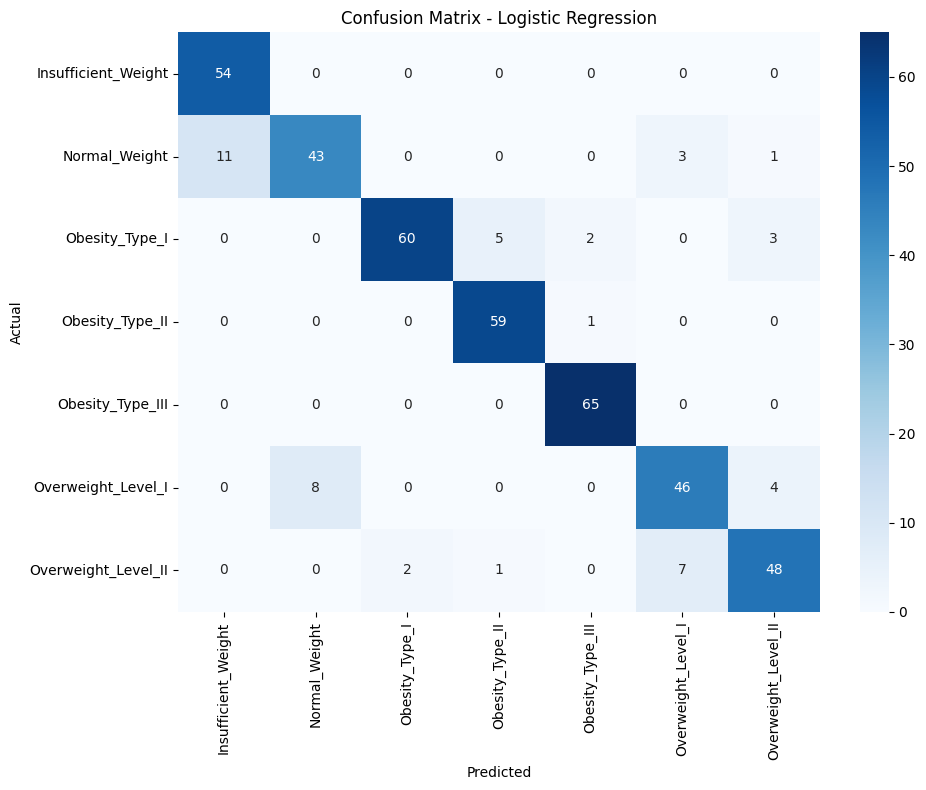


Топ-10 важных признаков:
                           feature  importance
3                           Weight   12.327082
2                           Height    3.325211
1                              Age    0.821022
4   family_history_with_overweight    0.601232
8                             CAEC    0.338863
12                             FAF    0.243231
0                           Gender    0.242487
15                          MTRANS    0.197015
14                            CALC    0.158129
5                             FAVC    0.141553


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Подготовка данных
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Кодирование категориальных признаков
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

X_encoded = X.copy()
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    label_encoders[col] = le

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=777, stratify=y_encoded
)

# Масштабирование признаков (важно для логистической регрессии)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создание и обучение модели логистической регрессии
logreg = LogisticRegression(
    multi_class='multinomial', 
    random_state=777,
    max_iter=1000,
    solver='lbfgs' 
)

logreg.fit(X_train_scaled, y_train)

# Предсказания
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder_y.classes_))

# Матрица ошибок
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=label_encoder_y.classes_, 
           yticklabels=label_encoder_y.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Важность признаков (коэффициенты)
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': np.abs(logreg.coef_[0])  
}).sort_values('importance', ascending=False)

print("\nТоп-10 важных признаков:")
print(feature_importance.head(10))

### Метрика ROC-криввые.

Построение ROC-кривых...


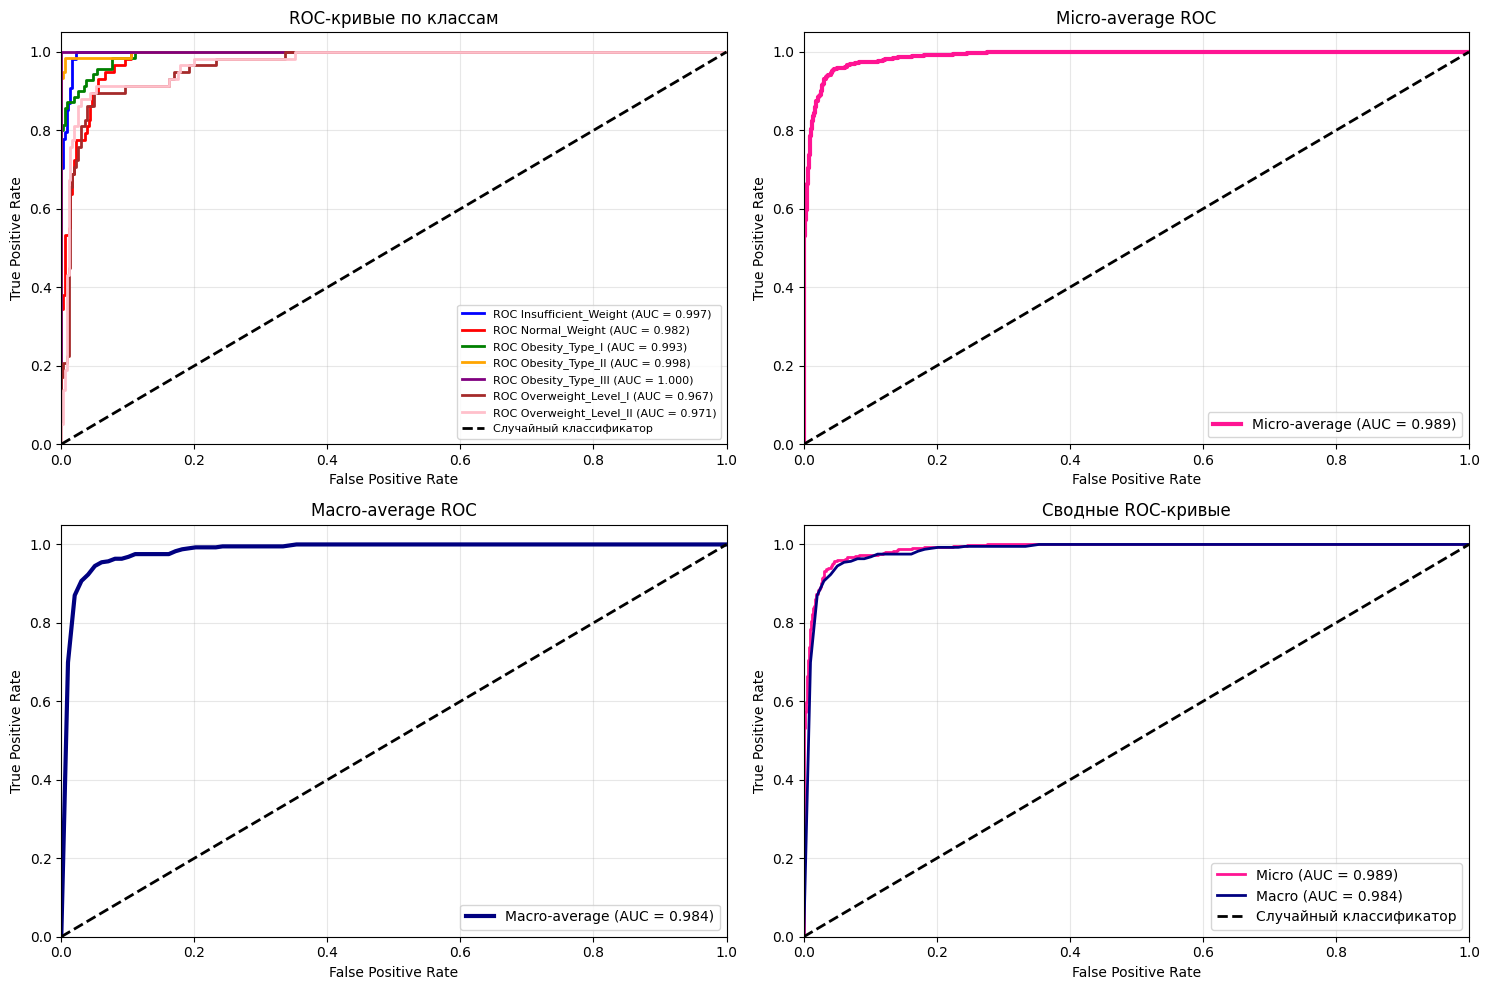

ROC-AUC МЕТРИКИ ДЛЯ МНОГОКЛАССОВОЙ КЛАССИФИКАЦИИ

One-vs-Rest (Macro):    0.9868
One-vs-One (Macro):     0.9868
Weighted ROC-AUC:       0.9871

ROC-AUC по классам:
  Insufficient_Weight : 0.9969
  Normal_Weight       : 0.9821
  Obesity_Type_I      : 0.9927
  Obesity_Type_II     : 0.9980
  Obesity_Type_III    : 1.0000
  Overweight_Level_I  : 0.9667
  Overweight_Level_II : 0.9709


In [39]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

def plot_multiclass_roc_simple(y_true, y_pred_proba, classes, figsize=(15, 10)):
    # Бинаризуем целевую переменную
    y_true_bin = label_binarize(y_true, classes=range(len(classes)))
    n_classes = len(classes)
    
    # Вычисляем ROC-кривую и ROC-AUC для каждого класса
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Вычисляем micro-average ROC-кривую и ROC-AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Вычисляем macro-average ROC-кривую
    # Создаем общие точки FPR
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.zeros_like(mean_fpr)
    
    for i in range(n_classes):
        # Интерполяция с помощью numpy
        tpr_interp = np.interp(mean_fpr, fpr[i], tpr[i])
        tpr_interp[0] = 0.0  # гарантируем, что начинается с 0
        mean_tpr += tpr_interp
    
    mean_tpr /= n_classes
    fpr["macro"] = mean_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Построение графиков
    plt.figure(figsize=figsize)
    
    # 1. Все классы отдельно
    plt.subplot(2, 2, 1)
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    for i in range(n_classes):
        color = colors[i % len(colors)]
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label='ROC {0} (AUC = {1:0.3f})'
                ''.format(classes[i], roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Случайный классификатор')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривые по классам')
    plt.legend(loc="lower right", fontsize=8)
    plt.grid(True, alpha=0.3)
    
    # 2. Micro-average
    plt.subplot(2, 2, 2)
    plt.plot(fpr["micro"], tpr["micro"],
            label='Micro-average (AUC = {0:0.3f})'
            ''.format(roc_auc["micro"]),
            color='deeppink', linestyle='-', linewidth=3)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Micro-average ROC')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    
    # 3. Macro-average
    plt.subplot(2, 2, 3)
    plt.plot(fpr["macro"], tpr["macro"],
            label='Macro-average (AUC = {0:0.3f})'
            ''.format(roc_auc["macro"]),
            color='navy', linestyle='-', linewidth=3)
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Macro-average ROC')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    
    # 4. Сводный график
    plt.subplot(2, 2, 4)
    
    # Micro и Macro
    plt.plot(fpr["micro"], tpr["micro"],
            label='Micro (AUC = {0:0.3f})'.format(roc_auc["micro"]),
            color='deeppink', linestyle='-', linewidth=2)
    
    plt.plot(fpr["macro"], tpr["macro"],
            label='Macro (AUC = {0:0.3f})'.format(roc_auc["macro"]),
            color='navy', linestyle='-', linewidth=2)
    
    # Диагональ
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Случайный классификатор')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Сводные ROC-кривые')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fpr, tpr, roc_auc

# Вычисляем ROC-AUC разными методами
def calculate_roc_auc_scores(y_true, y_pred_proba, classes):
    y_true_bin = label_binarize(y_true, classes=range(len(classes)))
    
    # One-vs-Rest (OvR) ROC-AUC
    roc_auc_ovr = roc_auc_score(y_true_bin, y_pred_proba, multi_class='ovr', average='macro')
    
    # One-vs-One (OvO) ROC-AUC  
    roc_auc_ovo = roc_auc_score(y_true_bin, y_pred_proba, multi_class='ovo', average='macro')
    
    # Weighted ROC-AUC
    roc_auc_weighted = roc_auc_score(y_true_bin, y_pred_proba, multi_class='ovr', average='weighted')
    
    # По классам
    roc_auc_per_class = roc_auc_score(y_true_bin, y_pred_proba, multi_class='ovr', average=None)
    
    print("ROC-AUC МЕТРИКИ ДЛЯ МНОГОКЛАССОВОЙ КЛАССИФИКАЦИИ")
    
    print(f"\nOne-vs-Rest (Macro):    {roc_auc_ovr:.4f}")
    print(f"One-vs-One (Macro):     {roc_auc_ovo:.4f}")
    print(f"Weighted ROC-AUC:       {roc_auc_weighted:.4f}")
    
    print(f"\nROC-AUC по классам:")
    for i, class_name in enumerate(classes):
        print(f"  {class_name:<20}: {roc_auc_per_class[i]:.4f}")
    
    return {
        'ovr_macro': roc_auc_ovr,
        'ovo_macro': roc_auc_ovo, 
        'weighted': roc_auc_weighted,
        'per_class': roc_auc_per_class
    }

# Получаем вероятности предсказаний
y_pred_proba = logreg.predict_proba(X_test_scaled)

# Строим ROC-кривые
print("Построение ROC-кривых...")
fpr, tpr, roc_auc = plot_multiclass_roc_simple(
    y_test, 
    y_pred_proba, 
    label_encoder_y.classes_
)

# Вычисляем все ROC-AUC метрики
roc_auc_scores = calculate_roc_auc_scores(
    y_test, 
    y_pred_proba, 
    label_encoder_y.classes_
)


АНАЛИЗ КАЧЕСТВА ПО ROC-AUC

Общий ROC-AUC (One-vs-Rest Macro): 0.9868
Интерпретация: Отличное качество классификации

Анализ по классам:
--------------------------------------------------
Лучший класс: Obesity_Type_III (AUC = 1.0000)
Худший класс: Overweight_Level_I (AUC = 0.9667)
Разброс AUC: 0.0333


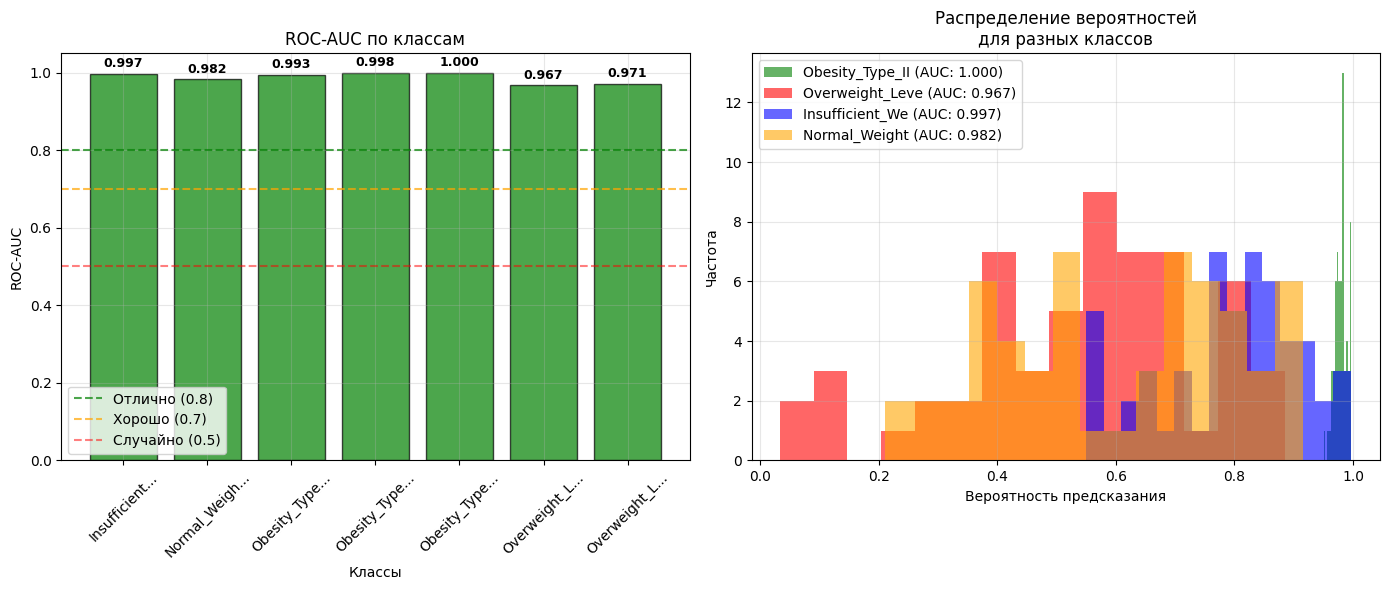

In [ ]:
# Анализ качества классификации по ROC-AUC
def analyze_roc_auc_quality(roc_auc_scores, classes):
    print("АНАЛИЗ КАЧЕСТВА ПО ROC-AUC")
    
    ovr_score = roc_auc_scores['ovr_macro']
    per_class_scores = roc_auc_scores['per_class']
    
    # Интерпретация общего ROC-AUC
    print(f"\nОбщий ROC-AUC (One-vs-Rest Macro): {ovr_score:.4f}")
    
    if ovr_score >= 0.9:
        interpretation = "Отличное качество классификации"
        color = "green"
    elif ovr_score >= 0.8:
        interpretation = "Хорошее качество классификации" 
        color = "blue"
    elif ovr_score >= 0.7:
        interpretation = "Удовлетворительное качество"
        color = "orange"
    elif ovr_score >= 0.6:
        interpretation = "Плохое качество"
        color = "red"
    else:
        interpretation = "Очень плохое качество"
        color = "darkred"
    
    print(f"Интерпретация: {interpretation}")
    
    # Анализ по классам
    print(f"\nАнализ по классам:")
    print("-" * 50)
    
    best_class_idx = np.argmax(per_class_scores)
    worst_class_idx = np.argmin(per_class_scores)
    
    print(f"Лучший класс: {classes[best_class_idx]} (AUC = {per_class_scores[best_class_idx]:.4f})")
    print(f"Худший класс: {classes[worst_class_idx]} (AUC = {per_class_scores[worst_class_idx]:.4f})")
    print(f"Разброс AUC: {per_class_scores[best_class_idx] - per_class_scores[worst_class_idx]:.4f}")
    
    # Визуализация AUC по классам
    plt.figure(figsize=(14, 6))
    
    # График 1: ROC-AUC по классам
    plt.subplot(1, 2, 1)
    colors = []
    for score in per_class_scores:
        if score >= 0.8:
            colors.append('green')
        elif score >= 0.7:
            colors.append('orange')
        else:
            colors.append('red')
    
    bars = plt.bar(range(len(classes)), per_class_scores, color=colors, alpha=0.7, edgecolor='black')
    plt.axhline(y=0.8, color='green', linestyle='--', alpha=0.7, label='Отлично (0.8)')
    plt.axhline(y=0.7, color='orange', linestyle='--', alpha=0.7, label='Хорошо (0.7)')
    plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Случайно (0.5)')
    
    plt.xlabel('Классы')
    plt.ylabel('ROC-AUC')
    plt.title('ROC-AUC по классам')
    plt.xticks(range(len(classes)), [name[:12] + '...' if len(name) > 12 else name 
                                   for name in classes], rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Добавляем значения на столбцы
    for bar, score in zip(bars, per_class_scores):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{score:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # График 2: Сравнение распределения вероятностей
    plt.subplot(1, 2, 2)
    
    # Берем несколько классов для сравнения 
    n_compare = min(4, len(classes))
    indices_to_compare = []
    
    # Добавляем лучший и худший класс
    indices_to_compare.append(best_class_idx)
    indices_to_compare.append(worst_class_idx)
    
    # Добавляем еще классы с разным качеством
    other_indices = [i for i in range(len(classes)) if i not in [best_class_idx, worst_class_idx]]
    if len(other_indices) >= 2:
        indices_to_compare.extend(other_indices[:2])
    
    colors_compare = ['green', 'red', 'blue', 'orange']
    
    for i, class_idx in enumerate(indices_to_compare[:n_compare]):
        if i < len(colors_compare):
            color = colors_compare[i]
        else:
            color = 'gray'
            
        # Вероятности для правильных предсказаний этого класса
        class_probs = y_pred_proba[y_test == class_idx, class_idx]
        if len(class_probs) > 0:
            plt.hist(class_probs, bins=15, alpha=0.6, color=color, 
                    label=f'{classes[class_idx][:15]} (AUC: {per_class_scores[class_idx]:.3f})')
    
    plt.xlabel('Вероятность предсказания')
    plt.ylabel('Частота')
    plt.title('Распределение вероятностей\nдля разных классов')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return best_class_idx, worst_class_idx

# Запускаем анализ
best_idx, worst_idx = analyze_roc_auc_quality(roc_auc_scores, label_encoder_y.classes_)